In [181]:
import pymongo
from pymongo import MongoClient
import pandas as pd

In [182]:
client = pymongo.MongoClient(host='localhost', port=27017)

In [183]:
db = client.ptt

In [184]:
db.list_collection_names()

['article']

In [185]:
collection = db.article

### 擷取內容

In [186]:
result = collection.find()
content = []
for row in result:
    content.append(row['content'])

- 處理標點符號

In [187]:
import re

In [188]:
# 如果空白符也需要过滤，使用 r'[^\w]'
i=0
for i in range(len(content)):
    content[i] = re.sub(r'[^\w\s]','',content[i])

In [192]:
content[0]

'Im feeling about SpiderMan gratitude and joy We got to make five films wit hin the MCU with SpiderMan two standalone films and three with the Avengers It was a dream that I never thought would happen It was never meant to lastf orever We knew there was a finite amount of time that wed be able to dothis and we told the story we wanted to tell and Ill always be thankful fortha t 我對蜘蛛人充滿感激跟喜悅我們有機會製作製作5部與蜘蛛人一起的電影2部個人電影 跟3部與復仇者們的電影這是我從來沒想過會發生的夢想這並不意味著他能永遠持續 下去我知道我們能做這些事情的時間是有限的 而我們已經講述了我們想要講的故事 而 我永遠會對此表示感激 其實凱文費吉是比較沒直接性的談自己不參與下一部電影而是用回顧他一直以來對蜘蛛 人還有已經做的事情巧妙的透露一點情報 荷蘭弟是也有表態雖然不知道未來如何但他仍然會持續演蜘蛛人是確定的 不過我覺得他講了一句今天會被台灣媒體直接當標題的關鍵句XD The future for SpiderMan will be different but it will be equally as awesome and amazing and well find new ways to make it even cooler 蜘蛛人的未來將會不一樣但這仍然會很棒跟充滿驚喜而我們會找到一個新的方法讓他 變得更酷 不知道這是暗示離家日的結尾帶來的改變還是談索尼跟迪士尼雙方談判帶來的可能結果 然後國外看完兩個人的訪談目前是崩潰狀態因為認為他們這樣講完基本上完蛋了XD Kevin Feige has spoken regarding SpiderMan leaving the MCU Source httpstcoipUzQWlhIt'

In [198]:
filename = './movie_content.txt'
with open(filename, 'w') as outfile:
    for row in content:
        outfile.write(row +'\n')

In [56]:
import jieba
import gensim
import wordcloud

In [57]:
import jieba.analyse
jieba.set_dictionary("dict/dict.txt.big.txt")

In [174]:
content[7]

'贏了票房卻傷了和氣 玩命關頭陷入分裂危機 新聞網址 httpbitly2KxJW75 連續2週都在台美2地拿下票房冠軍玩命關頭特別行動全台突破3億3200萬新台幣 票房美國也有1億800萬美金但是這部片卻讓玩命關頭系列陷入了分裂危機儘管 大家都不想明說但各種蛛絲馬跡都顯示這家人一切都回不去了 打從電影公司傳出要開拍玩命關頭特別行動扮演大嘴羅曼的泰瑞斯吉布森 Tyrese Gibson就在Instagram上放砲拜託巨石強森跟傑森史塔森千萬不要答應接拍 這樣會延後玩命關頭9的拍攝進度不要為了自己連累大家不要讓銀幕上的一家 人四分五裂但他的發言只是間接證實身兼製片的馮迪索干預了在玩命關頭8原 本要出現的隱藏片段也就是鋪哏給玩命關頭特別行動當時觀眾在戲院發現沒有 隱藏片段還感到納悶一反前幾集的慣例 然而就算沒有鋪哏的安排玩命關頭特別行動還是拍攝完畢順利上演拿下票房 冠軍泰瑞斯吉布森繼續在Instagram放砲動手拆散這個家絕對不是誰都能想到的 舉動這集特別行動的首週票房紀錄是打從第3集東京甩尾以來最低的巨石 強森他們那一掛還要回來跟我們一起拍玩命10裝沒事大和解那樣因為我們要滿足這 20年來支持這系列電影的粉絲只是發文沒有多久又自刪留下濃濃的火藥味 但是當玩命關頭特別行動連續2週都拿到票房冠軍後巨石強森終於也在推特上回 應了感謝所有支持這部片的粉絲超過3億美金的票房在全世界拿下第一別忘了 讓大嘴巴閉上的最佳辦法就是面帶微笑的成功而且他這段話裡頭還用了小丑的表 情符號一看就知道他在挖苦泰瑞斯而泰瑞斯則在Instagram貼出沒有黑夜星星就 無法放光明底下還加了句感謝上帝我痊癒了 總之這齣恩怨連續劇還不知道上演到何時才能結束但正在拍攝中的玩命關頭9已經 確認不會有巨石強森傑森史塔森的戲份但馮迪索找來另外一位摔角出身的肌肉男星約 翰希南江希南加入擴充電影的猛男陣容至於玩命關頭10要如何像泰瑞斯吉布 森所說的那樣把巨石強森等人找回來大和解就要看到時候編劇怎麼變出來了 用社群媒體互嘴的Family XDDDDDDDDDD Thats how it starts sir The fever the rage the feeling of powerlessness that turns good men cruel Alfred  Batman v Superman '

In [200]:
i=0
with open("./movie_content.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,10)
        print(str(i)+",".join(tags))
        i=i+1

0我們,SpiderMan,蜘蛛人,電影,was,make,films,MCU,never,充滿
1httpsyoutubeZcgNIdF3IQc,Netflix,傳聞,10,11,上線,將會,延續,劇情,講平克曼
2劇情,沒有,什麼,新作,恐怖片,雷文,個人,氣氛,一個,經典
3httpswwwinstagramcompB1jjmsslWKe,D23,漫威,影業,發佈會,首集,導演,Ryan,Coogler,回歸
4XD,Emilia,演技,Kit,覺得,比較,觀眾,不過,真的,飾演
5httpsiredditdqcvbm8rlfi31png,滿滿的,海報,風格,這次,走極,簡風,順便,發佈,曼達洛人
6主角,海邊,那個,惡鬼,徒步,一幕,恐怖片,發文,這部,怎麼
7恐怖片,忘記,小女孩,各位,大大,床底,驚悚,準備,睡覺,媽媽
8電影,下半場,台灣,我們,籃球,觀眾,這部,夢想,片中,因為
9預告,介紹,還是,電影,標題,海報,人氣,來看,因為,劇情
10美國,隊長,之後,無限,故事,巴奇,巴恩斯,情報,新聞,wiki
11一個,發現,感覺,電影,討厭,沒有,翻拍,完美,人生,已經
12汽車旅館,一個,戲院,秋風,長相,印象,相思,秋月明,想不起來,頗深
13男主角,有點,電影,開始,爸爸,畢竟,社會,道義,這個,父親
14修女,溫子仁,蓋瑞道,柏曼,德米,柯林,一名,一步,電影,名稱
15一種,因為,小偷,第二集,神偷,第三集,預告,httpswwwyoutubecomwatchvYPuhNtG47M0,最後,長官
16感人,爆哭,親情,互動,想問,電影片,愛情,那種,比較,喜歡
17其實,沒有,這部,沒什麼,好雷,劇情,當然,這片,強項,籃球場
18七龍珠,羅利,賽亞人,悟空,超布,從未見過,看板,弗利,故事,httpswwwfngtwscmview
19電影,媒體,指標,素質,他們,討論,踢踢,影評人,好評,結果
20第一集,忘光,馬上,趁機,先補,因為,其實,覺得,比較,圖書館
210824,類型,確定,感覺,片段,不是,想問,懸疑,驚悚,洋片
22克里斯多,摯友,維尼,羅賓,一個,出現,壓力,馬克,伊旺,麥奎格
23約翰,飯店,破壞,規矩,殺手,因為,告訴,後來,溫斯頓,老闆
24富豪,母親,兒子,女主角,女友,有點,電影,中是,出軌,離開
25萬美元

268蜘蛛人,票房,離家,復仇者,聯盟,索尼,影業,美國,79,根據
269選擇,這部,電影,問題,南韓,沒有,貧富差距,社會,系統性,人會
270高層,長老,權力,設定,一個,殺手,大陸,劇情,這個,幫派
271重映,戲院,當初,二輪,還是,新加,復仇者,聯盟,因為,這間
272電影,建築,有點,內容,謝謝,不是,片名,記得,推薦,獨立
273電影,炫目,英國,之光,賈維,布魯斯,普林斯,音樂,夢想,歌曲
274魔法,宮崎駿,尼爾,公主,蓋曼,美國,傳言,劇本,溫斯坦,武士刀
275剛剛,靈感,而發,超級,細胞,還有,人類,優異,身體,什麼
276經典,電影,這個,經典電影,劇情,感動,起來,裡的,台詞,子彈
277一個,問題,現在,什麼,鏡頭,哪裡,我們,討論,這部,電影
278驅魔,電影,使者,父親,龍厚,韓國,無法,我們,雖然,導演
279電影,氣味,類型,寄生上流,香水,一樣,喜歡,味道,描述,特徵
280恐怖片,覺得,咒怨,恐怖,良心,各位,哪部,以後,先說,個人
281女孩兒,電影,雖然,2019,約會,還在,電影院,沒什麼,就問,什麼
282大陸,電影局,發布,影展,問道,參加,金馬,國家,影片,金馬獎
283柯南,電影,怪盜,小蘭,園子,這次,特別,因為,京極,相當
284伯派,汀森,蝙蝠俠,有點,氣質,其實,覺得,這麼,私刑,飾演
285沒有,嫌犯,主角,關係人,兇手,台灣,直接,劇情,發現,認定
286動畫,劇場版,日本,本片,動畫電影,乘浪之約,消防員,記者,17,FREE
287布洛斯,皮爾斯,蝙蝠俠,阿福,電影,DC,龐德,製作,007,商談
288電影,林路迪,真人,商談,新版,利姆,塔斯,溫子仁,監製,漫威
289電影,什麼,主角,沒有,認為,這部,氣味,有錢人,我們,他們
290岡恩,鯊魚,自殺,突擊隊,重啟,詹姆斯,反派,積極,星際,攻隊
291電影,諧音,瘋雞,用語,低俗,哪部,其實,台灣,以來,偶爾
292伊莉莎白,邦迪,泰德,柴克,艾弗隆,連環,殺人,主演,根據,美國
293憤怒,一集,配音,電影,動畫,找來,許多,修羅,阿修羅,靈魂
294請問,武打片,武術,國際,台灣,幾乎,中國,有沒有,台灣籍,謝謝
295片名,電影,覺得,翻譯,XD,神鬼,一個,台灣,雖然,討論
296xd,太愛,這部,宣傳,藍光,dvd,應該,iT

In [214]:
# 將乾杯這首歌的關鍵字詞取出來 
# topK代表要取的關鍵字次數
word_dict ={}
with open("./movie_content.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,
                                          topK=10, 
                                          withWeight=True)
        for tag, weight in tags:
            pair = {tag : weight*10000}
            word_dict.update(pair)
            print(tag + "," + str(int(weight * 10000)))


我們,2988
SpiderMan,2390
蜘蛛人,2390
電影,2390
was,1793
make,1195
films,1195
MCU,1195
never,1195
充滿,1195
httpsyoutubeZcgNIdF3IQc,5977
Netflix,5977
傳聞,5977
10,5977
11,5977
上線,5977
將會,5977
延續,5977
劇情,5977
講平克曼,5977
劇情,4554
沒有,4554
什麼,3415
新作,2831
恐怖片,2647
雷文,2277
個人,2277
氣氛,2277
一個,2277
經典,2277
httpswwwinstagramcompB1jjmsslWKe,5692
D23,5692
漫威,5692
影業,5692
發佈會,5692
首集,5692
導演,5692
Ryan,5692
Coogler,5692
回歸,5692
XD,4235
Emilia,3294
演技,1582
Kit,1411
覺得,1411
比較,1411
觀眾,1411
不過,1411
真的,1330
飾演,941
httpsiredditdqcvbm8rlfi31png,7032
滿滿的,7032
海報,7032
風格,7032
這次,7032
走極,7032
簡風,7032
順便,7032
發佈,7032
曼達洛人,7032
主角,3604
海邊,2686
那個,2686
惡鬼,2686
徒步,2095
一幕,1808
恐怖片,1561
發文,1343
這部,1343
怎麼,1343
恐怖片,6043
忘記,5197
小女孩,4016
各位,3323
大大,2872
床底,2632
驚悚,2598
準備,2598
睡覺,2598
媽媽,2598
電影,2864
下半場,1953
台灣,1302
我們,1302
籃球,1172
觀眾,911
這部,651
夢想,651
片中,546
因為,520
預告,10395
介紹,10395
還是,10395
電影,5197
標題,5197
海報,5197
人氣,5197
來看,5197
因為,5197
劇情,5197
美國,5517
隊長,3678
之後,3678
無限,3678
故事,2824
巴奇,2138
巴恩斯,2138
情報,1839
新聞,1839
wiki,1

個人,2780
偏愛,2780
電影,3231
報導,2538
蜘蛛人,2307
蜘蛛,1564
好萊塢,1384
Sony,1384
出現,1153
WSJ,1153
Marvel,1153
萬美元,1153
地獄,8819
對方,3919
少女,3814
怨恨,3559
飾演,2939
真人版,1959
電影,1959
釋出,1959
視覺,1959
海報,1959
入圍,3113
名單,3113
德國,2490
電影,2490
蘿莉,2490
破壞,2490
影展,1303
拿下,1299
奧斯卡,1245
國際,1245
報導,3856
蜘蛛人,3213
電影,2249
好萊塢,1928
Sony,1928
WSJ,1606
Marvel,1606
萬美元,1606
Disney,1606
關於,1285
妮可,2935
莎莉賽,2656
基嫚,2656
主播,2656
卡爾森,2656
飾演,2656
預告,1771
瑪格,1771
羅比,1771
揭發,1771
電影,9962
細菌,6641
主軸,6641
因為,3320
幾片,3320
歐美,3320
內容,3320
主題,3320
寄生蟲,3320
沒有,3320
蜘蛛人,7379
漫威,5903
索尼,4780
其實,2951
並不,2951
鋼鐵,2951
不在,2951
意外,1591
加持,1494
httpscuttlyowdnLUz,1475
水桶,6940
違反,3026
板規,3026
言論,3026
lol9978,3026
一個月,3026
檢舉,3026
文章,2515
可悲,2350
公告,2088
什麼,5352
Tony,3568
懷孕,3568
驚訝,3568
時間,3568
討論,3568
怎麼,3568
生日,2418
快生了,1910
還是,1784
No,2988
龐德,2988
英國,2988
007,2490
Time,2490
Die,2490
克雷格,2201
丹尼爾,1992
飾演,1992
男星,1477
攻佔,2490
航海王,2490
奪寶,2490
爭霸戰,2490
下半場,2490
貞子,2490
殺手,2490
動作,2490
88,2490
寓言,1934
續集,3358
經典,3358
駭客任務,2014
比肩,1758
實在,134

邪氣,2946
主角,2541
感覺,2525
電影,2104
應該,2104
覺得,1683
比較,1683
類型,1262
陰鬱,1262
單純,1262
驅魔,3815
這部,3815
沒有,3815
覺得,3815
比較,2543
劇情,2543
緊湊,2543
個人,2543
算是,2083
恐怖片,1478
電影,6418
獨立,3209
類型,2407
自己,2128
然後,1604
成長,1604
學習,1604
改變,1604
覺得,1604
感覺,1604
叢林,2570
改變,1928
動物,1928
片中,1617
雷文,1285
動畫,1285
因為,1285
隨著,1285
物種,1285
我們,1285
主角,7076
那位,4084
剛在,3516
Netflix,3516
這部,3516
最後,3516
那個,3516
神經,3516
老闆,3516
女兒,3516
警徽,8237
警察,5580
改掉,4099
MV,2656
一樣,2656
警校,1853
制服,1850
蔡依林,1793
還是,1771
雖然,1771
殺敵,9022
許多,4511
電影,4511
哪部,2284
檯面,2255
動作片,2255
基努,2255
李維傑,2255
森史,2255
塔森古,2255
電影,10131
鏢客,6078
接觸,4052
黃昏,4052
傳記,4052
不過,4052
先說,2026
現在,2026
19,2026
因為,2026
電影,3835
類型,2557
地心,1634
科摩,1295
推薦,1278
不錯,1278
動物,1278
盡量,1278
鯊魚,1278
水深火熱,1278
覺得,6291
這部,6291
無間,3145
無間道,3145
的話,3145
難看,3145
幾乎,3145
指連,3145
對話,3145
場景,3145
電影,11069
類型,6641
特徵,2574
簡述,2213
片單,2213
尋找,2213
盡量,2213
動物,2213
反撲,2213
級片,2213
不過,3856
主角,1724
演出,1456
片商,1420
第一片,1321
雖然,1285
這麼,1285
群去,1285
某種程度,1285
對象,1285
劇情,4657
附身,4447
哥哥,330

中國,2582
發言,1475
香港,1255
支持,1253
你們,1106
推特,1106
已經,1106
美國,1106
當局,1106
抗議者,1106
電影,9962
柯南,3792
台灣,3622
上映,3540
票房,3401
102,2716
億元,2716
大關,2716
持續,2716
片商,2001
黑寡婦,4483
Richters,4483
Olivier,3984
電影,2988
運動員,2490
健美,2093
反派,1650
已經,1494
現在,1494
加盟,1443
寄生上流,2790
大乘,2714
奧斯卡,1395
預告,1395
哈希,1395
進軍,930
南韓,930
電影,930
配樂,930
美國,930
戲院,6831
一輪,4554
二輪,4554
比較,3415
還是,3415
二輪電影,1707
當然,1707
一點,1707
電影,1707
銀幕,1707
芳達,14490
彼得,8125
影星,5943
新聞,3622
網址,3622
httpspeoplecommoviespeterfondadeadat79,3622
資深,3622
演員,3622
Peter,3622
Fonda,3622
當時,4912
鬼片,4912
現在,3275
阿凡,1904
童年陰影,1637
電影院,1637
分級,1637
禁區,1637
十二歲,1637
老實,1637
沒有,8662
電影,3465
懸疑,3465
只有,3164
主文,1781
故事,1774
片長,1732
107,1732
開始,1732
緩慢,1732
小魯,4781
當時,4781
電影,3187
廟會,2390
限制級,2390
覺得,2390
露天電影,1593
陰影,1593
寫實,1593
比較,1593
男主角,7936
感動,7356
第二集,5672
貝利,5517
第一集,5268
麥克斯,3678
畫面,3678
最後,3678
輪流,3678
第三集,2031
洛基,6603
王后,6231
幻術,5977
神器,4920
索爾,3984
母親,3984
寒冰族,3984
劇情,1992
欺敵,1992
可見,1992
劉亦菲,3049
花木蘭,3049
許多,1829
BoycottMul,1829
電影,182

In [215]:
word_dict

{'我們': 1440.3334340843373,
 'SpiderMan': 2097.327632087719,
 '蜘蛛人': 2390.95350058,
 '電影': 3284.276786510989,
 'was': 1793.215125435,
 'make': 1195.47675029,
 'films': 1195.47675029,
 'MCU': 5372.929214786517,
 'never': 1195.47675029,
 '充滿': 1195.47675029,
 'httpsyoutubeZcgNIdF3IQc': 5977.383751449999,
 'Netflix': 3516.108089088235,
 '傳聞': 5977.383751449999,
 '10': 4347.188182872727,
 '11': 1077.0060813423422,
 '上線': 5977.383751449999,
 '將會': 5977.383751449999,
 '延續': 1343.2323036966293,
 '劇情': 3145.9914481315786,
 '講平克曼': 5977.383751449999,
 '沒有': 14943.459378624999,
 '什麼': 2988.6918757249996,
 '新作': 2831.912458688572,
 '恐怖片': 2527.3959367272732,
 '雷文': 1313.7107146043954,
 '個人': 933.9662111640624,
 '氣氛': 2277.0985719809523,
 '一個': 1508.488012984227,
 '經典': 2160.500151126506,
 'httpswwwinstagramcompB1jjmsslWKe': 5692.746429952381,
 'D23': 2480.2422205186717,
 '漫威': 2328.850812253246,
 '影業': 2122.1480774378697,
 '發佈會': 5692.746429952381,
 '首集': 898.8546994661655,
 '導演': 910.839428792380

In [217]:
sorted(word_dict.items(), key=lambda d: d[1],reverse=True)

[('囉嗦', 29886.918757249998),
 ('上圖', 29886.918757249998),
 ('httpsiimgurcom6SNNuZ5jpg', 29886.918757249998),
 ('欣賞', 19924.61250483333),
 ('菜鳥', 19924.61250483333),
 ('他演', 19924.61250483333),
 ('httpsyoutubeG75wAEs1hxs', 17078.23928985714),
 ('蠻酷', 17078.23928985714),
 ('沒有', 14943.459378624999),
 ('飛翔', 14943.459378624999),
 ('陶比', 14943.459378624999),
 ('分數', 14943.459378624999),
 ('影評', 14943.459378624999),
 ('腦洞', 14943.459378624999),
 ('大開', 14943.459378624999),
 ('httpswwwmirrormediamgstory20190812inf002', 14943.459378624999),
 ('芳達', 14490.627276242423),
 ('樂聲', 13283.075003222222),
 ('伊森', 13283.075003222222),
 ('收工', 12485.8183081875),
 ('U2', 11954.767502899998),
 ('優惠', 11954.767502899998),
 ('完結', 11954.767502899998),
 ('約翰', 11773.634661946968),
 ('規劃', 11207.59453396875),
 ('驚奇', 11120.713956186046),
 ('謝謝', 10867.970457181817),
 ('物語', 10867.970457181817),
 ('筆電', 10867.970457181817),
 ('下限', 10650.97537305),
 ('介紹', 10395.450002521738),
 ('午馬', 10205.289331743901),
 ('

## Topic 從標題來判斷討論趨勢

In [59]:
len(collection.find({'title':'[討論] 日本電影 "來了"'}))

TypeError: object of type 'Cursor' has no len()

In [218]:
result = collection.find()
title = []
for row in result:
    title.append(row['title'])

In [219]:
len(title)

400

In [62]:
for i in title:
    print(i)

[討論] 日本電影 "來了"
Re: [討論] 日本電影 "來了"
[討論] 《黑色黨徒》與《幸福綠皮書》
[討論] 要怎麼看運鏡手法？
Re: [新聞] 《小美人魚》主演荷莉貝莉首回選角爭議：
Re: [討論] 日本電影 "來了"
[好雷] 盧安達日記 Beautifully Broken, 2018美
[新聞] 贏了票房卻傷了和氣　《玩命關頭》陷入分
[新聞] 迪士尼不看好《變種人》 可能小規模放映
[板規] 新增/單日發文總量限制
[情報] 亞藝影音 中坡店、永貞店 9/20結束營業
[情報] 《知道天空有多藍的人》官方釋出第三彈主
[討論] 寄生上流二刷
[片單]
[好雷] 迷弟出頭天!靠追星逆轉人生的炫目之光
[新聞] 「航海王：奪寶爭霸戰」日本再破紀錄 台灣將有4D超震撼刺激版
[新聞] 「復仇者聯盟」哪個角色最難演？導演說是他！！
[新聞] 《小美人魚》艾瑞克王子主演敲定
[問片] 關於地球的電影
[贈票] 今晚 19:00 炫目之光@大直美麗華
[情報] 劇場版《SHIROBAKO》特報釋出，甜甜圈五
Re: [新聞] 真人版《阿拉丁》續集有望推出！ 製片：
[新聞] 片名標新立異？最新小婦人變她們 網友不解
[討論] 日本原爆74週年，電影，螢火蟲之墓
[情報] Last Christmas 去年耶誕 預告片
[討論] 為什麼李連杰照片傳聞這麼多
[好雷]《痛苦與榮耀》創作從來都不是從零開始 
[好雷]MIB星際戰警: 你多久沒有仰望星空了? 
Re: [討論] 迪士尼請的翻譯是不是不夠力
[討論] 只要一句台詞就知道的電影
[討論] 緝魔最後打敗大魔王的關鍵（雷
[新聞] 「是誰斬斷血脈」 紀錄片揭中共計生政策
[討論]為什麼美國隊長打了超級血清還會變老?
[新聞] 宮崎駿曾送武士刀去美國 《魔法公主》的2
[好雷]《炫目之光》音樂最觸動人心之處 
[公告] 暫定版規。歡迎討論，一個月後定案
[公告] 板規新增每日發文上限規定
[請益] 請問台灣有武打巨星嗎？
[新聞] 「憤怒鳥2」三大看點報你知！竟藏神力女超人DNA
[Live] FOX_Movies 21:00 極惡人魔 
[討論] 為何要用「人生瘋雞掰」當片名？
[新聞] 詹姆斯岡恩積極明示！《自殺突擊隊》反柚
Re: [討論] 寄生上流的朴先生到底是錯在哪？
[新聞] 溫子仁監製新版《真

In [220]:
i=0
for i in range(len(title)):
    title[i] = re.sub(r'[^\w\s]','',title[i])

In [222]:
title[0]

'情報 凱文費吉談蜘蛛人'

In [245]:
filename = './movie_title.txt'
with open(filename, 'w') as outfile:
    for row in title:
        outfile.write(row +'\n')

In [246]:
with open("./movie_title.txt", "rb") as f:
    i=0
    for line in f:
        tags = jieba.analyse.extract_tags(line,10)
        print(str(i)+",".join(tags))
        i=i+1

0情報,凱文,費吉談,蜘蛛人
1討論,絕命,毒師,電影版,預告,曝光
2負雷,貞子,起源
3情報,20220506,黑豹,上映
4情報,Kit,Harington,將在,永恆,飾演,黑騎士
5討論,Star,Wars,海報,發佈
6恐怖片,問片,惡鬼,追殺,徒步,解答,主角
7小女孩,問片,還有,一個,一樣,床下,床上
8好雷,下半場,我們,驕傲,感到
9討論,電影,預告
10請益,黑寡婦,內容,前傳,不是
11好雷,親密,陌生人
12問片,懸疑片,一部,十年
13討論,攻佔,親情,爆雷,好多,元素,全面
14LIVE,HBO,修女
15Re,討論,預告,首支,滴血,第一
16片單,親情,愛情,感人
17好雷,下半場
18Live,七龍珠,超布,羅利,衛視,電影,2100
19Re,討論,指標,影評人,影評,媒體,哪些
20討論,1990,版本,必要
21問片,後座,小孩,坐在
22Live,東森,洋片,2100,摯友,維尼
23討論,捍衛,任務,應該,破壞,規矩
24問片,舊片,關於,出軌,外遇
25新聞,2019,最會,史嘉蕾喬,韓森拔,頭籌,女星
26新聞,火瓊恩雪諾,漫威,電影,宇宙,加入
27好雷,航海王,奪寶,爭霸戰
28討論,關於,夜總會,問題,鬼魂,可可,消失
29討論,華納,高層,怎麼,規劃,DCEU,如果
30有雷,下半場,籃球,灑花,劇場,兄弟
31情報,豬頭,極度,好評,927,票房,青春,少年,日本
32新聞,蜘蛛人,計畫,漫威,總裁,從未,做過,已有
33Re,討論,蜘蛛人,不會,索尼,票房,肯定,自己
34好雷,再見
35討論,指標,影評人,影評,媒體,哪些
36新聞,藍祖蔚,下半場,血淚,齊飛,籃球
37Re,討論,蜘蛛人,不會,索尼,票房,肯定,自己
38討論,蜘蛛人,情報
39閒聊,Disney,收錄,內容,電影,編集,預告
40請益,一個,字頭,誕生,之台灣,外景
41Re,討論,007,翻譯,片名
42新聞,黛安,克魯格,密會,正港,女特務
43請益,Disney,釋出,海報,流氓,小姐
44討論,玩爛,超級,英雄
45好雷,下半場,Champions
46問片,島上,充滿,舊片,妖怪,一部
47負雷,海賊王,動畫,20,週年紀念,電影
48負雷,攻佔,天使,救援,全面
49好雷,殺手,當個,學習,寓言,普通人,需要
50好雷

In [243]:
word_dict ={}
with open("./movie_title.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,
                                          topK=10, 
                                          withWeight=True)
        for tag, weight in tags:
            pair = {tag : weight*10000}
            word_dict.update(pair)
            print(tag + "," + str(int(weight * 10000)))


情報,29886
凱文,29886
費吉談,29886
蜘蛛人,29886
討論,19924
絕命,19924
毒師,19924
電影版,19924
預告,19924
曝光,13409
負雷,39849
貞子,39849
起源,24228
情報,29886
20220506,29886
黑豹,26912
上映,23367
情報,17078
Kit,17078
Harington,17078
將在,17078
永恆,17078
飾演,17078
黑騎士,17078
討論,23909
Star,23909
Wars,23909
海報,23909
發佈,23909
恐怖片,19858
問片,17078
惡鬼,17078
追殺,17078
徒步,13322
解答,12034
主角,11457
小女孩,23093
問片,14943
還有,14943
一個,14943
一樣,14943
床下,12796
床上,8388
好雷,23909
下半場,23909
我們,23909
驕傲,23909
感到,10523
討論,39849
電影,39849
預告,39849
請益,23909
黑寡婦,23909
內容,23909
前傳,23909
不是,7579
好雷,39849
親密,39849
陌生人,29235
問片,29886
懸疑片,29886
一部,16189
十年,16003
討論,17078
攻佔,17078
親情,17078
爆雷,17078
好多,10654
元素,9776
全面,8034
LIVE,39849
HBO,39849
修女,35606
Re,19924
討論,19924
預告,19924
首支,19330
滴血,17391
第一,8621
片單,47819
親情,23909
愛情,23909
感人,18551
好雷,59773
下半場,59773
Live,17078
七龍珠,17078
超布,17078
羅利,17078
衛視,17078
電影,17078
2100,17078
Re,17078
討論,17078
指標,17078
影評人,17078
影評,17078
媒體,17078
哪些,10256
討論,29886
1990,29886
版本,18954
必要,15030
問片,29886
後座,29886
小孩,18839
坐在,13827
Li

色情,10578
人生,8559
討論,23909
美隊,23909
當時,23909
什麼,23909
有雷,23909
情報,17078
蜘蛛人,17078
記錄,17078
增刪,17078
片段,14452
索尼,13830
刷新,11714
Re,23909
討論,23909
寄生上流,23909
到底,11605
先生,11128
請益,19924
捍衛,19924
任務,19924
劇情,19924
一個,19924
問題,19924
重映,23167
情報,19924
復仇者,19924
聯盟,19924
二輪,19924
上映,15578
問片,14943
美國,14943
片名,11807
底特律,11570
芝加哥,10221
好像,7021
城市,6232
不是,4737
好雷,19924
音樂,19924
觸動,19924
炫目,17614
之光,15906
人心,12292
新聞,19924
宮崎駿,19924
武士刀,19924
美國,19924
魔法,17019
公主,12511
討論,17078
什麼,17078
美國,17078
隊長,17078
超級,17078
還會變,17078
血清,12120
討論,19924
台詞,19924
電影,19924
一句,8987
只要,8437
知道,6623
討論,23909
成龍,23909
城市獵人,23909
一個,23909
問題,23909
普好,14943
雷驅,14943
墜入,14943
深淵,14943
良善,13695
放手,10759
使者,9846
保持,6070
片單,29886
氣味,29886
相關,29886
電影,29886
恐怖片,27801
哪部,24217
討論,23909
無敵,23909
狀態,23909
哪一部,20485
討論,19924
約會,19924
應該,19924
看熱映,19924
第一次,9516
新聞,14943
金馬獎,14943
陸片,14943
掛零,14943
問道,14943
少年,8896
退出,7215
宣布,6774
好雷,19924
名偵探柯南,19924
紺青,19924
之拳,19924
五刷,19924
心得,15411
討論,14943
覺得,14943
伯派,14943
汀森,14943
蝙蝠俠,

In [253]:
# 將每首歌的前10個tags存檔
import codecs
wtags = codecs.open("./movie_tags.txt", "w","utf-8")
with open("./movie_title.txt", "r") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        wtags.write(" ".join(words))
f1.close()

# 把所有歌的前10個tags變為萃取資料的input
with open("./movie_tags.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15)
        print(",".join(tags))
f2.close()

討論,Re,新聞,蜘蛛人,電影,請益,漫威,情報,好雷,問片,關於,攻佔,談判,預告,破局


### 使用文字雲呈現(未斷詞處理)

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

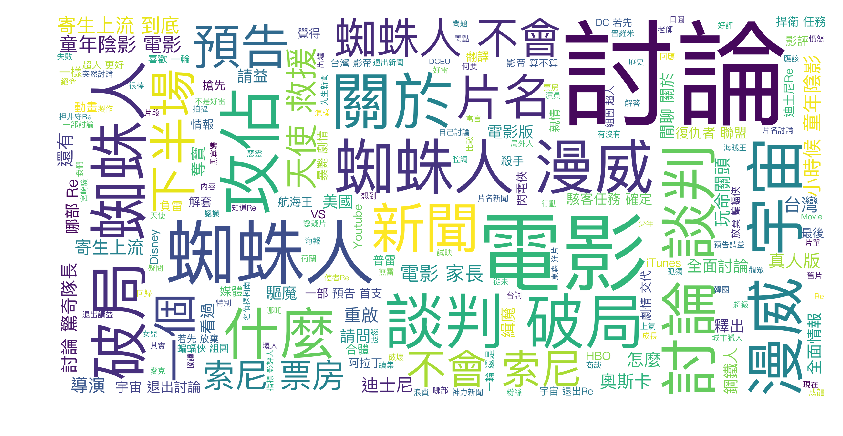

In [291]:
# 讀取每首歌的前10個tags
text = open("./movie_tags.txt").read()
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["肯定","問片","相關","水桶"])
# 產生文字雲
wc = WordCloud(scale=6, font_path="PingFang.ttc", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)
# 視覺化呈現
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.imshow(wc)
plt.axis("off")
#plt.figure(figsize=(10,6), dpi = 500)
with open('./movie.png','wb') as f: 
    plt.savefig(f, format='png', dpi=100) 
plt.show()

### 增加電影名稱相關之新詞

In [68]:
import pandas as pd

In [69]:
movie_df = pd.read_csv('./movielist.csv')

In [70]:
len(movie_df)

72

In [39]:
movie_df.head()

,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,周票數變動率,銷售金額,累計銷售票數,累計銷售金額
0,1,美國,朵拉與失落的黃金城,2019/08/09,美商美國派拉蒙影片股份有限公司台灣分公司,PARAMOUNT PICTURES CORPORATION,88,"4,198",17.62%,"947,135","35,963","8,076,741"
1,2,日本,蠟筆小新電影 新婚旅行風暴-奪回廣志大作戰,2019/08/09,木棉花國際股份有限公司,ADK EMOTIOS INC.,31,"2,006",0.10%,"453,450","17,529","4,035,672"
2,3,日本,乘浪之約,2019/08/09,台北双喜電影發行股份有限公司,Fuji Creative Coporation,28,912,-9.34%,"214,400","7,109","1,650,148"
3,4,俄羅斯,絕世名伶,2019/08/09,天馬行空數位有限公司,(德國)KINOSTAR FILMVERLEIH GMBH,9,400,26.18%,"79,990","2,321","471,516"
4,5,法國,出發吧！我的脫單假期,2019/08/09,海鵬影業有限公司,Le Pacte,10,207,29.38%,"44,225","1,337","291,523"


In [40]:
movie_df.tail()

,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,周票數變動率,銷售金額,累計銷售票數,累計銷售金額
67,68,美國,禁入墳場,2019/04/12,美商美國派拉蒙影片股份有限公司台灣分公司,PARAMOUNT PICTURES CORPORATION,1,7,16.67%,980,"94,445","21,436,737"
68,69,美國,奇幻遊樂園,2019/04/04,美商美國派拉蒙影片股份有限公司台灣分公司,PARAMOUNT PICTURES CORPORATION,1,14,16.67%,"1,400","53,064","11,585,892"
69,70,美國,小飛象,2019/03/29,台灣華特迪士尼股份有限公司,"BUENA VISTA INTERNATIONAL, INC.",3,61,117.86%,"3,950","379,945","86,323,398"
70,71,美國,驚奇隊長,2019/03/06,台灣華特迪士尼股份有限公司,"BUENA VISTA INTERNATIONAL, INC.",1,12,100.00%,600,"1,699,287","404,385,751"
71,72,加拿大,哈柏太空之旅 3D,2019/02/04,國際電影事業有限公司,IMAX Corporation,1,0,0.00%,0,485,"69,140"


In [41]:
movie_df['中文片名']

0                  朵拉與失落的黃金城
1      蠟筆小新電影 新婚旅行風暴-奪回廣志大作戰
2                       乘浪之約
3                       絕世名伶
4                 出發吧！我的脫單假期
5                       懸案判決
6                     一定要結婚嗎
7                    怎麼就，結婚了
8                      是誰在搞鬼
9                    大人的戀愛情事
10                 在黑暗中說的鬼故事
11                      靈異乍現
12                      櫻花開了
13                     痛苦與榮耀
14                   電梯男孩的奇蹟
15                      王的文字
16                    我出去透透氣
17                    完全邪惡指南
18                 玩命關頭:特別行動
19           電影哆啦A夢：大雄的月球探測記
20                     人生消極掰
21                      駭客任務
22                       鬼學怨
23                     漫長的告別
24                      出走巴黎
25                  從前，有個好萊塢
26                      電流大戰
27                     首席指揮家
28              瑪雅蜜蜂大冒險：蜜糖危機
29    城市獵人劇場版 新宿Private Eyes
               ...          
42                     大叔好神騎
43                      九龍不敗
44                   安娜貝爾回家囉
45            

In [45]:
filename = './movie_name.txt'
with open(filename, 'w') as outfile:
    for name in movie_df['中文片名']:
        outfile.write(name +' '+ '10' + '\n')

In [244]:
jieba.load_userdict('./movie_name.txt')


### 分詞

In [88]:
test_result = collection.find({'title':'[選片] 痛苦與榮耀、人生消極掰'})

In [89]:
for i in test_result:
    test_title = i['title']

In [92]:
test_title

'[選片] 痛苦與榮耀、人生消極掰'

In [100]:
seg_list = jieba.cut(test_title)  # 默认是精确模式
print(", ".join(seg_list))

[, 選片, ],  , 痛苦與榮耀, 、, 人生消極掰


In [101]:
seg_list = jieba.cut(test_title, cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式



Full Mode: / / 選片/ / / / 痛苦/ 痛苦與榮耀/ 榮耀/ / / 人生/ 人生消極掰/ 消極/ 掰


In [102]:
seg_list = jieba.cut(test_title, cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Default Mode: [/ 選片/ ]/  / 痛苦與榮耀/ 、/ 人生消極掰


### 增加電影名稱相關之新詞 - part2

In [ ]:
def fetch(url):
    response = requests.get(url)
    response = requests.get(url, cookies={'over18': '1'})  # 一直向 server 回答滿 18 歲了 !
    return response

In [ ]:
from requests_html import HTML

def parse_article_entries(doc):
    html = HTML(html=doc)
    post_entries = html.find('div.r-ent')
    return post_entries

In [ ]:
def get_metadata_from(url):

    def parse_next_link(doc):
        domain = 'https://www.ptt.cc/' 
        html = HTML(html=doc)
        controls = html.find('.action-bar a.btn.wide')
        link = controls[1].attrs.get('href')
        return urllib.parse.urljoin(domain, link)

    resp = fetch(url)
    post_entries = parse_article_entries(resp.text)
    next_link = parse_next_link(resp.text)

    metadata = [parse_article_meta(entry) for entry in post_entries]
    return metadata, next_link

### 載入停用字

In [402]:
stopwords = ['https','http','imgur','jpg','www','youtu','youtube','XD','tw','com','movie','ptt','一個','什麼','沒有','最後']
filename = './stopwords_mv.txt'
with open(filename, 'w') as outfile:
    for row in stopwords:
        outfile.write(row +'\n')

In [403]:
jieba.analyse.set_stop_words('./stopwords_mv.txt')

### 文字雲呈現 => 斷詞

In [295]:
content[0]

'Im feeling about SpiderMan gratitude and joy We got to make five films wit hin the MCU with SpiderMan two standalone films and three with the Avengers It was a dream that I never thought would happen It was never meant to lastf orever We knew there was a finite amount of time that wed be able to dothis and we told the story we wanted to tell and Ill always be thankful fortha t 我對蜘蛛人充滿感激跟喜悅我們有機會製作製作5部與蜘蛛人一起的電影2部個人電影 跟3部與復仇者們的電影這是我從來沒想過會發生的夢想這並不意味著他能永遠持續 下去我知道我們能做這些事情的時間是有限的 而我們已經講述了我們想要講的故事 而 我永遠會對此表示感激 其實凱文費吉是比較沒直接性的談自己不參與下一部電影而是用回顧他一直以來對蜘蛛 人還有已經做的事情巧妙的透露一點情報 荷蘭弟是也有表態雖然不知道未來如何但他仍然會持續演蜘蛛人是確定的 不過我覺得他講了一句今天會被台灣媒體直接當標題的關鍵句XD The future for SpiderMan will be different but it will be equally as awesome and amazing and well find new ways to make it even cooler 蜘蛛人的未來將會不一樣但這仍然會很棒跟充滿驚喜而我們會找到一個新的方法讓他 變得更酷 不知道這是暗示離家日的結尾帶來的改變還是談索尼跟迪士尼雙方談判帶來的可能結果 然後國外看完兩個人的訪談目前是崩潰狀態因為認為他們這樣講完基本上完蛋了XD Kevin Feige has spoken regarding SpiderMan leaving the MCU Source httpstcoipUzQWlhIt'

In [298]:
result = collection.find()
content = []
for row in result:
    content.append(row['content'])

In [ ]:
# 如果空白符也需要过滤，使用 r'[^\w]'
i=0
for i in range(len(content)):
    content[i] = re.sub(r'[^\w\s]','',content[i])

In [313]:
words = jieba.cut(content[0], cut_all=False)

print("Output 精確模式 Full Mode：\n",
    '\n'.join([word for word in words]))


Output 精確模式 Full Mode：
 Im
 
feeling
 
about
 
SpiderMan
 
gratitude
 
and
 
joy
.
 
We
 
got
 
to
 
make
 
five
 
films
 
wit
 
hin
 
the
 
MCU
 
with
 
SpiderMan
:
 
two
 
standalone
 
films
 
and
 
three
 
with
 
the
 
Avengers
.
 
It
 
was
 
a
 
dream
 
that
 
I
 
never
 
thought
 
would
 
happen
.
 
It
 
was
 
never
 
meant
 
to
 
lastf
 
orever
.
 
We
 
knew
 
there
 
was
 
a
 
finite
 
amount
 
of
 
time
 
that
 
wed
 
be
 
able
 
to
 
dothis
 
and
 
we
 
told
 
the
 
story
 
we
 
wanted
 
to
 
tell
 
and
 
Ill
 
always
 
be
 
thankful
 
fortha
 
t
 
我
對
蜘蛛人
充滿
感激
跟
喜悅
，
我們
有
機會
製作
製作
5
部
與
蜘蛛人
一起
的
電影
，
2
部
個人
電影
 
跟
3
部
與
復仇者
們
的
電影
，
這是
我
從來沒
想
過會
發生
的
夢想
，
這並
不
意味著
他
能
永遠
持續
 
下去
，
我
知道
我們
能
做
這些
事情
的
時間
是
有限
的
，
 
而
我們
已經
講述
了
我們
想要
講的
故事
 
，
而
 
我
永遠
會
對此
表示感激
 
其實
凱文
費吉是
比較
沒
直接
性
的
談
自己
不
參與
下
一部
電影
，
而是
用
回顧
他
一直
以來
對
蜘蛛
 
人
還有
已經
做
的
事情
巧妙
的
透露
一點
情報
 
荷蘭
弟是
也
有
表態
雖然
不
知道
未來
如何
，
但
他
仍然
會
持續
演
蜘蛛人
是
確定
的
 
不過
我
覺得
他講
了
一句
今天
會
被
台灣
媒體
直接
當
標題
的
關鍵
句
XD
 
The
 
future


In [352]:
content[0]

'Im feeling about SpiderMan gratitude and joy. We got to make five films wit hin the MCU with SpiderMan: two standalone films and three with the Avengers. It was a dream that I never thought would happen. It was never meant to lastf orever. We knew there was a finite amount of time that wed be able to dothis and we told the story we wanted to tell and Ill always be thankful fortha t 我對蜘蛛人充滿感激跟喜悅，我們有機會製作製作5部與蜘蛛人一起的電影，2部個人電影 跟3部與復仇者們的電影，這是我從來沒想過會發生的夢想，這並不意味著他能永遠持續 下去，我知道我們能做這些事情的時間是有限的， 而我們已經講述了我們想要講的故事 ，而 我永遠會對此表示感激 其實凱文費吉是比較沒直接性的談自己不參與下一部電影，而是用回顧他一直以來對蜘蛛 人還有已經做的事情巧妙的透露一點情報 荷蘭弟是也有表態雖然不知道未來如何，但他仍然會持續演蜘蛛人是確定的 不過我覺得他講了一句今天會被台灣媒體直接當標題的關鍵句XD The future for SpiderMan will be different but it will be equally as awesome and amazing and well find new ways to make it even cooler. 蜘蛛人的未來將會不一樣，但這仍然會很棒跟充滿驚喜，而我們會找到一個新的方法讓他 變得更酷 (不知道這是暗示離家日的結尾帶來的改變還是談索尼跟迪士尼雙方談判帶來的可能結果) 然後國外看完兩個人的訪談目前是崩潰狀態，因為認為他們這樣講完基本上完蛋了XD Kevin Feige has spoken regarding SpiderMan leaving the MCU: Source: https://t.co/ipUzQWlhIt)'

In [353]:
words = jieba.cut(content[0], cut_all=False)

print("Output 精確模式 Full Mode：\n",
    '\n'.join([word for word in words]))

Output 精確模式 Full Mode：
 Im
 
feeling
 
about
 
SpiderMan
 
gratitude
 
and
 
joy
.
 
We
 
got
 
to
 
make
 
five
 
films
 
wit
 
hin
 
the
 
MCU
 
with
 
SpiderMan
:
 
two
 
standalone
 
films
 
and
 
three
 
with
 
the
 
Avengers
.
 
It
 
was
 
a
 
dream
 
that
 
I
 
never
 
thought
 
would
 
happen
.
 
It
 
was
 
never
 
meant
 
to
 
lastf
 
orever
.
 
We
 
knew
 
there
 
was
 
a
 
finite
 
amount
 
of
 
time
 
that
 
wed
 
be
 
able
 
to
 
dothis
 
and
 
we
 
told
 
the
 
story
 
we
 
wanted
 
to
 
tell
 
and
 
Ill
 
always
 
be
 
thankful
 
fortha
 
t
 
我
對
蜘蛛人
充滿
感激
跟
喜悅
，
我們
有
機會
製作
製作
5
部
與
蜘蛛人
一起
的
電影
，
2
部
個人
電影
 
跟
3
部
與
復仇者
們
的
電影
，
這是
我
從來沒
想
過會
發生
的
夢想
，
這並
不
意味著
他
能
永遠
持續
 
下去
，
我
知道
我們
能
做
這些
事情
的
時間
是
有限
的
，
 
而
我們
已經
講述
了
我們
想要
講的
故事
 
，
而
 
我
永遠
會
對此
表示感激
 
其實
凱文費吉
是
比較
沒
直接
性
的
談
自己
不
參與
下
一部
電影
，
而是
用
回顧
他
一直
以來
對
蜘蛛
 
人
還有
已經
做
的
事情
巧妙
的
透露
一點
情報
 
荷蘭
弟是
也
有
表態
雖然
不
知道
未來
如何
，
但
他
仍然
會
持續
演
蜘蛛人
是
確定
的
 
不過
我
覺得
他講
了
一句
今天
會
被
台灣
媒體
直接
當
標題
的
關鍵
句
XD
 
The
 
future


In [323]:
jieba.add_word('凱文費吉', True)

In [355]:
content_split = []
i=0
for i in range(len(content)):
    words = jieba.cut(content[i], cut_all=False, HMM=True)
    temp_content = ''
    for word in words:
            temp_content = temp_content + ' ' + word
    content_split.append(temp_content)

In [358]:
content_split[1]

' https : / / youtu . be / ZcgNIdF3IQc   之前 Netflix 外流 的 傳聞 是 真的 今年 10 月 11 日 上線 ， 將會 延續 本篇 的 劇情 ， 講平克曼 的   逃亡 他 的 好友 瘦子 皮特 也 會 回歸  '

In [359]:
# 如果空白符也需要过滤，使用 r'[^\w]'
i=0
for i in range(len(content_split)):
    content_split[i] = re.sub(r'[^\w\s]','',content_split[i])

In [369]:
content_split[2]

' 雷文 防雷 資訊 頁                                       雷文   主文 分隔線                                      1  代理 公司 不 知道 為 什麼 把 此部 電影  命名 為 起源  在 之前 的 電影版 中 已經 把貞子 的 劇情   交代 非常 清楚 了  但 還是 期待 新作 中會 有 什麼 火花 碰 出來  但 實際上 蠻 失望 的    2  聊聊 本作 可惜 的 地方  個人 覺得 一 開頭 的 的 對白 和 配樂 氣氛 做 的 很 好  對不起  一個 人   很 寂寞 吧   但 似乎 並 沒有 好好 的 把 氣氛 延續下去  片尾曲 也 很 熱血 很 好聽  蠻 適合 女主   角 的 底迪  但 不 知道 為 什麼 都 沒有 好好 運用    3  劇情 方面  有雷   其實 我 為 了 新作  還 特別 複習 舊作 的 三集  我 認為 新作 在 劇情 方面 真   的 不是 很 緊湊 很 刺激  定位 為 一個 經典 恐怖片  貞子 從 電視機 爬出來 的 畫面  真的 沒有 恐   怖 的 感覺  反而 最後 趴 地板 爬 得 蠻 快 的  有點 好笑  最 經典 的 錄影帶 劇情 也 拔掉 了  也   沒有 松島 菜 菜子 的 加成  總體而言 個人 是 不 太 推薦 這部 恐怖片   '

In [373]:
filename = './movie_content_withsplit.txt'
with open(filename, 'w') as outfile:
    for row in content_split:
        outfile.write(row +'\n\n')

In [374]:
# 將每首歌的前10個tags存檔
import codecs
wtags = codecs.open("./movie_tags_ws.txt", "w","utf-8")
with open("./movie_content_withsplit.txt", "r") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        wtags.write(" ".join(words))
f1.close()

# 把所有歌的前10個tags變為萃取資料的input
with open("./movie_tags_ws.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15)
        print(",".join(tags))
f2.close()

電影,https,com,蜘蛛人,覺得,漫威,一個,沒有,這部,劇情,什麼,imgur,索尼,最後,我們


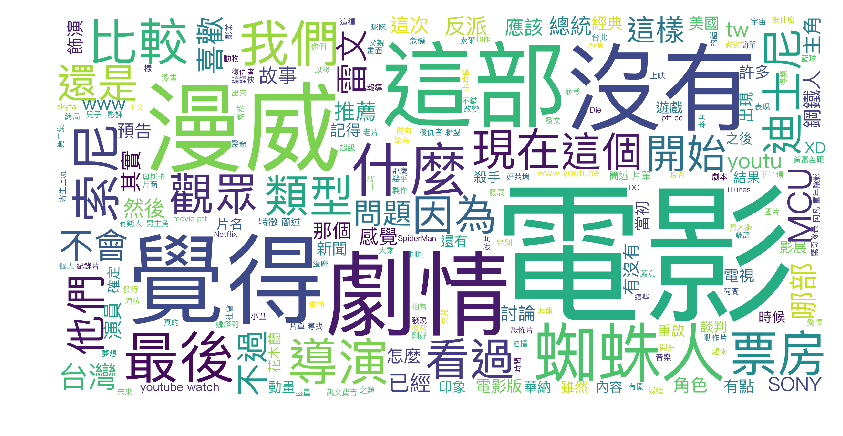

In [408]:
# 讀取每首歌的前10個tags
text = open("./movie_tags_ws.txt").read()
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["肯定","問片","相關","水桶","http","https","com","一個", "imgur","jpg"])
# 產生文字雲
wc = WordCloud(scale=6, font_path="PingFang.ttc", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)
# 視覺化呈現
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.imshow(wc)
plt.axis("off")
#plt.figure(figsize=(10,6), dpi = 500)
with open('./movie.png','wb') as f: 
    plt.savefig(f, format='png', dpi=100) 
plt.show()

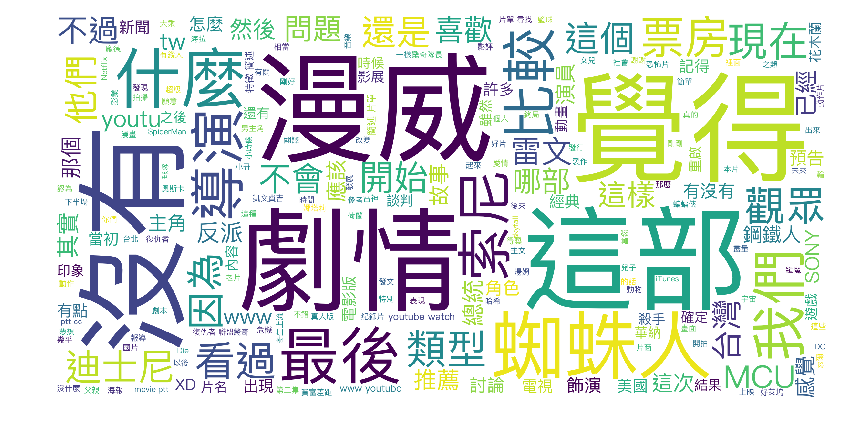

In [407]:
# 讀取每首歌的前10個tags
text = open("./movie_tags_ws.txt").read()
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["肯定","問片","相關","水桶","http","https","com","一個", "imgur","jpg",'電影'])
# 產生文字雲
wc = WordCloud(scale=6, font_path="PingFang.ttc", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)
# 視覺化呈現
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.imshow(wc)
plt.axis("off")
#plt.figure(figsize=(10,6), dpi = 500)
with open('./movie.png','wb') as f: 
    plt.savefig(f, format='png', dpi=100) 
plt.show()

### 所有文章的Top關鍵字

In [382]:
stopwords = ['https','http','imgur','jpg','www','youtu','youtube','XD','tw','com','movie','ptt']
filename = './stopwords_mv.txt'
with open(filename, 'w') as outfile:
    for row in stopwords:
        outfile.write(row +'\n')

In [383]:
jieba.analyse.set_stop_words('./stopwords_mv.txt')

In [404]:
# 把所有歌的前10個tags變為萃取資料的input
with open("./movie_tags_ws.txt", "rb") as f2:
    for line in f2:
        print('ok')
        tags = jieba.analyse.extract_tags(line,50)
        inte_tags = ' '.join(tags)
f2.close()

ok


In [405]:
inte_tags

'電影 蜘蛛人 覺得 漫威 這部 劇情 索尼 我們 比較 導演 這個 反派 因為 現在 哪部 觀眾 開始 喜歡 他們 類型 看過 不會 這樣 還是 然後 票房 MCU 不過 台灣 預告 感覺 其實 問題 復仇者 演員 總統 鋼鐵人 雷文 已經 應該 記得 飾演 推薦 這次 迪士尼 經典 那個 怎麼 美國 討論'

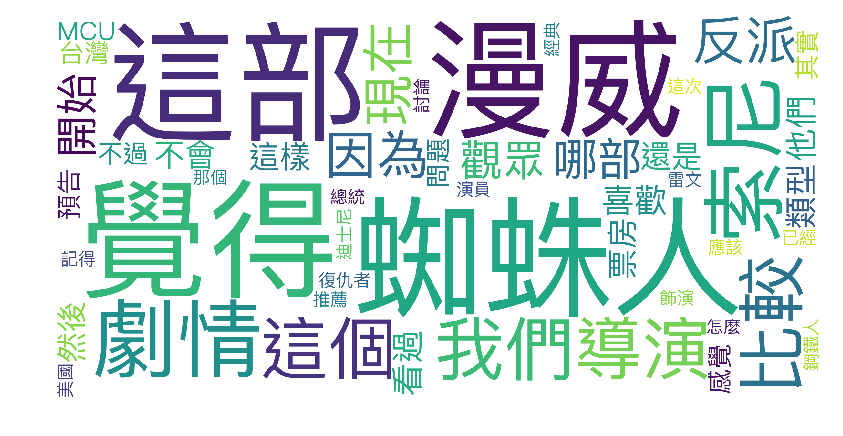

In [406]:
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["肯定","問片","相關","水桶","http","https","com","一個", "imgur","jpg",'電影'])
# 產生文字雲
wc = WordCloud(scale=6, font_path="PingFang.ttc", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(inte_tags)
# 視覺化呈現
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.imshow(wc)
plt.axis("off")
#plt.figure(figsize=(10,6), dpi = 500)
with open('./movie.png','wb') as f: 
    plt.savefig(f, format='png', dpi=100) 
plt.show()